In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from sklearn.decomposition import PCA

In [2]:
df=pd.read_excel('Diversidad Hospital_merge_HPy.xlsx', sheet_name='MERGE')
df

,taxlevel,taxon,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,...,CO-S,TR-S,PR-S,total,dominio,phylo,clase,orden,familia,genero
0,0,Root,24726.0,45269.0,34453.0,15626.0,25580.0,43204.0,33321.0,57900.0,...,15156.0,11068.0,12593.0,473916.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Bacteria,24726.0,45269.0,34453.0,15626.0,25580.0,43204.0,33321.0,57900.0,...,15156.0,11068.0,12593.0,473916.0,Bacteria,NaN,NaN,NaN,NaN,NaN
2,2,Acidobacteria,0.0,0.0,0.0,122.0,0.0,0.0,0.0,0.0,...,30.0,144.0,137.0,2060.0,Bacteria,Acidobacteria,NaN,NaN,NaN,NaN
3,3,Acidobacteria_unclassified,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,Bacteria,Acidobacteria,Acidobacteria_unclassified,NaN,NaN,NaN
4,4,Acidobacteria_unclassified,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,Bacteria,Acidobacteria,Acidobacteria_unclassified,Acidobacteria_unclassified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,6,Mollicutes_RF39_ge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,Bacteria,Tenericutes,Mollicutes,Mollicutes_RF39,Mollicutes_RF39_fa,Mollicutes_RF39_ge
1211,4,Opitutales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,Bacteria,Verrucomicrobia,Verrucomicrobiae,Opitutales,NaN,NaN
1212,5,Puniceicoccaceae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,Bacteria,Verrucomicrobia,Verrucomicrobiae,Opitutales,Puniceicoccaceae,NaN
1213,6,Puniceicoccaceae_ge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,Bacteria,Verrucomicrobia,Verrucomicrobiae,Opitutales,Puniceicoccaceae,Puniceicoccaceae_ge


In [3]:
metadatos=pd.read_excel('Metadatos.xlsx', sheet_name='METADATOS')

In [4]:
metadatos=metadatos.set_index('Name')


In [5]:
metadatos

,Muestra tipo,SUM Python merge,Ventilación,Tipo zona,Zona,Tª,H. relativa,"Particulas 0,3 m",Initial number of sequences,% of removed chimera,Secuencias antes de restar negativos,Sequences final number,Number of OTUs,Chao-1,Shannon H Index,Simpson Index
Name,,,,,,,,,,,,,,,,
CO-A,Aire,43204.0,Cerrada,HOSPITALARIA,Sala espera interior y pasillo,23.6,51.4,49555,127978,0.9,63073,43204,45,59.00,2.731,0.9140
CO-S,Superfie,15156.0,Cerrada,HOSPITALARIA,Sala espera interior y pasillo,23.6,51.4,49555,114536,2.1,53946,15156,119,126.00,3.185,0.8803
EH-A,Aire,24726.0,Cerrada,EXTERNA,Sala espera fuera de la unidad,23.6,48.1,51952,121854,0.8,51395,24726,52,71.50,2.662,0.8765
EH-S,Superfie,40072.0,Cerrada,EXTERNA,Sala espera fuera de la unidad,23.6,48.1,51952,145497,0.9,68237,40072,54,57.75,2.924,0.9159
ICU-CO-A,Aire,45269.0,Abierta,UVI,Pasillos,24.9,50.1,134665,128997,3.4,62697,45269,51,51.17,3.014,0.9364
ICU-CO-S,Superfie,15738.0,Abierta,UVI,Pasillos,24.9,50.1,134665,102384,4.5,26178,15738,398,422.80,4.415,0.9668
ICU-PR1-A,Aire,15626.0,Cerrada,UVI,Hab 408? Con paciente de 4 días,25.8,49.5,35430,131555,5.8,19876,15626,374,398.00,2.608,0.9785
ICU-PR1-S,Superfie,18508.0,Abierta,UVI,Hab 408? Con paciente de 4 días,25.8,49.5,35430,93628,8.3,43931,18508,235,254.00,2.254,0.6584
ICU-PR2-A,Aire,22118.0,Abierta,UVI,Hab 405 Vacía,24.8,45.9,25311,141284,3.9,67436,22118,37,39.50,4.483,0.9070


 # <span style='color:blue'>Secuencias totales vs secuencias únicas </span>

### Cargamos el dataframe del nivel 6 del documento 'Diversidad Hospital_merge_HPy.xlsx', sheet_name='MERGE'
Realizamos una limpieza de columnas que para la visualización en la mayoria de casos no son útiles.

In [6]:
tax6= df[df.taxlevel==6]
del tax6['taxlevel']
del tax6['total']
del tax6['dominio']
del tax6['phylo']
del tax6['clase']
del tax6['orden']
del tax6['familia']
del tax6['genero']
tax6=tax6.set_index('taxon')
tax6=tax6.fillna(0)
tax6

,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S
taxon,,,,,,,,,,,,,,,,,,
Acidobacteria_unclassified,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Acidipila,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bryocella,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Granulicella,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
Acidobacteriaceae_(Subgroup_1),0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xanthomonadaceae_uncultured,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
Leptospira,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
Mollicutes_RF39_ge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Para una visualización rápida de las muestras en terminos de secuencias totales y secuencias únicas 

<AxesSubplot:>

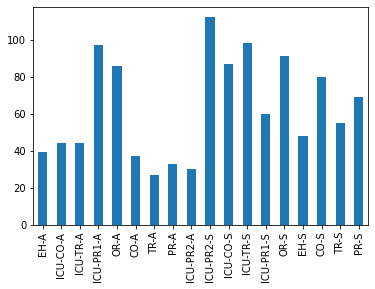

In [7]:
dfuniques=tax6.nunique()
dfuniques.plot.bar(x=None, y=None)

In [8]:
type(dfuniques)

pandas.core.series.Series

In [9]:
a = tax6.sum()

<AxesSubplot:>

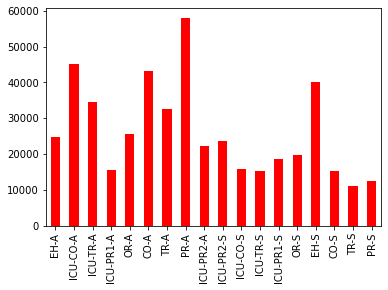

In [10]:
a.plot.bar(x=None, y=None, color='red')

#### Como encuentro bastantes diferencias quiero superponer las gráficas, logicamente no tienen la misma escala, necesito dos ejes para solucionarlo. 

In [11]:
frame = { 'Nº secuencias únicas': dfuniques, 'Nº secuencias total': a }

In [12]:
df4 = pd.DataFrame(frame)
df4['unicas'] = 'Nº secuencias únicas'
df4['totales'] = 'Nº secuencias total'
df4

,Nº secuencias únicas,Nº secuencias total,unicas,totales
EH-A,39,24726.0,Nº secuencias únicas,Nº secuencias total
ICU-CO-A,44,45269.0,Nº secuencias únicas,Nº secuencias total
ICU-TR-A,44,34453.0,Nº secuencias únicas,Nº secuencias total
ICU-PR1-A,97,15626.0,Nº secuencias únicas,Nº secuencias total
OR-A,86,25580.0,Nº secuencias únicas,Nº secuencias total
CO-A,37,43204.0,Nº secuencias únicas,Nº secuencias total
TR-A,27,32708.0,Nº secuencias únicas,Nº secuencias total
PR-A,33,57900.0,Nº secuencias únicas,Nº secuencias total
ICU-PR2-A,30,22118.0,Nº secuencias únicas,Nº secuencias total
ICU-PR2-S,112,23652.0,Nº secuencias únicas,Nº secuencias total


In [13]:
#import altair as alt


#source = data.wheat()

base = alt.Chart(df4.reset_index()).encode(x='index:O')

bar = base.mark_bar(opacity=0.7).encode(y='Nº secuencias total:Q', color='totales:N')

line =  base.mark_bar(opacity=0.7, color='orange').encode(
    y='Nº secuencias únicas:Q',
    color='unicas:N'

)

(bar + line).properties(width=600).resolve_scale(
    y = 'independent'
)


alt.LayerChart(...)

In [14]:
#base = alt.Chart(df4.reset_index()).encode(x='index:O')

#bar = base.mark_bar(opacity=0.7).encode(y='Nº secuencias total:Q')

#line =  base.mark_bar(opacity=0.7, color='orange').encode(
#    y='Nº secuencias únicas:Q'

#)

#(bar + line).properties(width=600).resolve_scale(
#    y = 'independent'
#)


In [15]:
df4.describe() #puedo ver la media de secuencias únicas por muestra y es muy baja la media

,Nº secuencias únicas,Nº secuencias total
count,18.000000,18.000000
mean,63.166667,26294.611111
std,27.173192,13206.759362
min,27.000000,11068.000000
25%,40.250000,15654.000000
50%,57.500000,22885.000000
75%,86.750000,34016.750000
max,112.000000,57900.000000


##  <span style='color:blue'> Índices de Diversidad 

Para entender mejor que tipo de diversidad tenemos en las muestras en cuanto a abundancia, riqueza, y especies raras.

In [16]:
sns.set_theme(style="white", context="talk")

Text(0.5, 0.98, 'Indices de diversidad')

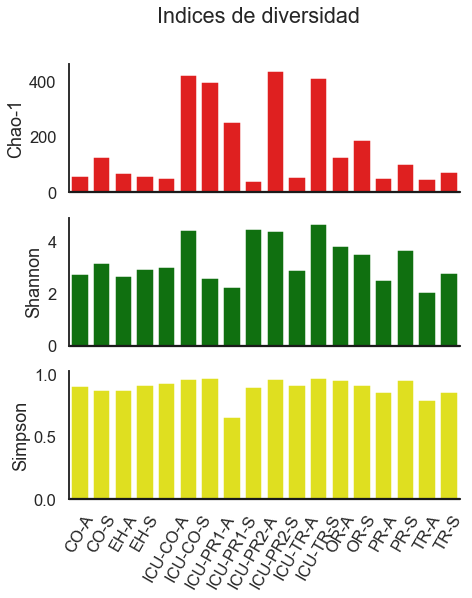

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 8), sharex=True)
sns.barplot(x=metadatos.index, y=metadatos['Chao-1'],color="red", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Chao-1")
ax1.set_xlabel('')
sns.barplot(x=metadatos.index, y=metadatos['Shannon H Index'], color="green", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel('Shannon')
ax2.set_xlabel('')
sns.barplot(x=metadatos.index, y=metadatos['Simpson Index'], color="yellow", ax=ax3)
plt.xticks(rotation=60)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel('Simpson')
ax3.set_xlabel('')
sns.despine(bottom=True)
#plt.setp(f.axes, yticks=[])
#plt.tight_layout(h_pad=2)
f.suptitle('Indices de diversidad')

In [18]:
sns.barplot(x=metadatos.index, y=metadatos['Chao-1'], palette="rocket", ax=ax1)

<AxesSubplot:xlabel='Name', ylabel='Chao-1'>

In [19]:
ax1.axhline(0, color="k", clip_on=False)

In [20]:
ax1.set_ylabel("Chao-1")

Text(25.200000000000003, 0.5, 'Chao-1')

In [21]:
sns.barplot(x=metadatos.index, y=metadatos['Shannon H Index'], palette="vlag", ax=ax2)

<AxesSubplot:xlabel='Name', ylabel='Shannon H Index'>

In [22]:
sns.barplot(x=metadatos.index, y=metadatos['Simpson Index'], palette="deep", ax=ax3)

<AxesSubplot:xlabel='Name', ylabel='Simpson Index'>

In [23]:
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

<Figure size 432x288 with 0 Axes>

Intento meter los índices en una misma gráfica junto con el total de secuencias, pero no termino de verlo claro.

In [24]:
meta = metadatos.copy()

In [25]:
del meta['Muestra tipo']
del meta['SUM Python merge']
del meta['Ventilación']
del meta['Tipo zona']
del meta['Zona']
del meta['Initial number of sequences']
del meta['% of removed chimera']
del meta['Secuencias antes de restar negativos']
del meta['Sequences final number']
del meta['Number of OTUs']
meta


,Tª,H. relativa,"Particulas 0,3 m",Chao-1,Shannon H Index,Simpson Index
Name,,,,,,
CO-A,23.6,51.4,49555,59.00,2.731,0.9140
CO-S,23.6,51.4,49555,126.00,3.185,0.8803
EH-A,23.6,48.1,51952,71.50,2.662,0.8765
EH-S,23.6,48.1,51952,57.75,2.924,0.9159
ICU-CO-A,24.9,50.1,134665,51.17,3.014,0.9364
ICU-CO-S,24.9,50.1,134665,422.80,4.415,0.9668
ICU-PR1-A,25.8,49.5,35430,398.00,2.608,0.9785
ICU-PR1-S,25.8,49.5,35430,254.00,2.254,0.6584
ICU-PR2-A,24.8,45.9,25311,39.50,4.483,0.9070


In [26]:
meta_norm = meta/meta.sum()

In [27]:
meta_norm = meta_norm.sort_values('Name')
meta_norm.index

Index(['CO-A', 'CO-S', 'EH-A', 'EH-S', 'ICU-CO-A', 'ICU-CO-S', 'ICU-PR1-A',
       'ICU-PR1-S', 'ICU-PR2-A', 'ICU-PR2-S', 'ICU-TR-A', 'ICU-TR-S', 'OR-A',
       'OR-S', 'PR-A', 'PR-S', 'TR-A', 'TR-S'],
      dtype='object', name='Name')

In [28]:
with pd.ExcelWriter('Metadatos.xlsx', engine = 'openpyxl', mode='a') as writer:
    meta_norm.to_excel(writer,index=False, sheet_name='norm')

In [29]:
with pd.ExcelWriter('Metadatos.xlsx', engine = 'openpyxl', mode='a') as writer:
    meta.to_excel(writer,index=False, sheet_name='meta')

In [30]:
tax1= df[df.taxlevel==1]
tax1.columns


Index(['taxlevel', 'taxon', 'EH-A', 'ICU-CO-A', 'ICU-TR-A', 'ICU-PR1-A',
       'OR-A', 'CO-A', 'TR-A', 'PR-A', 'ICU-PR2-A', 'ICU-PR2-S', 'ICU-CO-S',
       'ICU-TR-S', 'ICU-PR1-S', 'OR-S', 'EH-S', 'CO-S', 'TR-S', 'PR-S',
       'total', 'dominio', 'phylo', 'clase', 'orden', 'familia', 'genero'],
      dtype='object')

In [31]:
tax1

,taxlevel,taxon,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,...,CO-S,TR-S,PR-S,total,dominio,phylo,clase,orden,familia,genero
1,1,Bacteria,24726.0,45269.0,34453.0,15626.0,25580.0,43204.0,33321.0,57900.0,...,15156.0,11068.0,12593.0,473916.0,Bacteria,NaN,NaN,NaN,NaN,NaN


In [32]:
tax1 = tax1[meta_norm.index]

In [33]:
tax1.T

,1
CO-A,43204.0
CO-S,15156.0
EH-A,24726.0
EH-S,40072.0
ICU-CO-A,45269.0
ICU-CO-S,15738.0
ICU-PR1-A,15626.0
ICU-PR1-S,18508.0
ICU-PR2-A,22118.0
ICU-PR2-S,23652.0


In [34]:
meta['total']=tax1.T

In [35]:
meta

,Tª,H. relativa,"Particulas 0,3 m",Chao-1,Shannon H Index,Simpson Index,total
Name,,,,,,,
CO-A,23.6,51.4,49555,59.00,2.731,0.9140,43204.0
CO-S,23.6,51.4,49555,126.00,3.185,0.8803,15156.0
EH-A,23.6,48.1,51952,71.50,2.662,0.8765,24726.0
EH-S,23.6,48.1,51952,57.75,2.924,0.9159,40072.0
ICU-CO-A,24.9,50.1,134665,51.17,3.014,0.9364,45269.0
ICU-CO-S,24.9,50.1,134665,422.80,4.415,0.9668,15738.0
ICU-PR1-A,25.8,49.5,35430,398.00,2.608,0.9785,15626.0
ICU-PR1-S,25.8,49.5,35430,254.00,2.254,0.6584,18508.0
ICU-PR2-A,24.8,45.9,25311,39.50,4.483,0.9070,22118.0


In [36]:
import altair as alt


#source = data.wheat()

base = alt.Chart(meta.reset_index()).encode(x='Name:O')

bar = base.mark_bar().encode(y='total:Q')

line =  base.mark_line(color='red').encode(
    y='Chao-1:Q'
)


(bar + line).properties(width=600).resolve_scale(
    y = 'independent'
)

alt.LayerChart(...)

Text(0.5, 0.98, 'Indices de diversidad')

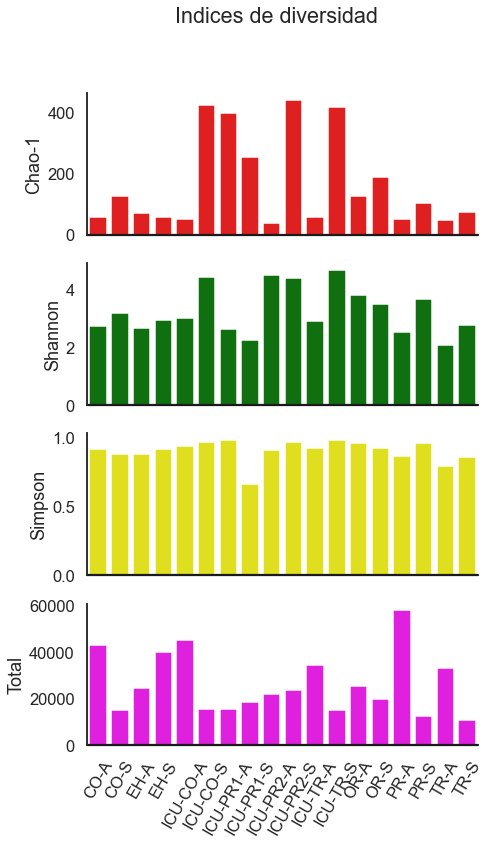

In [37]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(7, 12), sharex=True)
sns.barplot(x=meta.index, y=meta['Chao-1'],color="red", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Chao-1")
ax1.set_xlabel('')
sns.barplot(x=meta.index, y=meta['Shannon H Index'], color="green", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel('Shannon')
ax2.set_xlabel('')
sns.barplot(x=meta.index, y=meta['Simpson Index'], color="yellow", ax=ax3)
plt.xticks(rotation=60)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel('Simpson')
ax3.set_xlabel('')
sns.barplot(x=meta.index, y=meta['total'],color="magenta", ax=ax4)
ax4.axhline(0, color="k", clip_on=False)
ax4.set_ylabel("Total")
ax4.set_xlabel('')
sns.despine(bottom=True)
#plt.setp(f.axes, yticks=[])
#plt.tight_layout(h_pad=2)
f.suptitle('Indices de diversidad')

Al final he añadido a la primera opción de gráfica las barras del total de secuencias para poder verlo a simple vista

## <span style='color:blue'>Diagrama de barras de Phylos (taxlevel 2)
Seleciono solo nivel 2 que me seleciona dentro de los niveles taxonómicos Phylo, para visualizar los grandes grupos de bacterias que tenemos y un poco la diversidad de philos que se encuentran

In [38]:
tax2= df[df.taxlevel==2]

In [39]:
tax2.columns

Index(['taxlevel', 'taxon', 'EH-A', 'ICU-CO-A', 'ICU-TR-A', 'ICU-PR1-A',
       'OR-A', 'CO-A', 'TR-A', 'PR-A', 'ICU-PR2-A', 'ICU-PR2-S', 'ICU-CO-S',
       'ICU-TR-S', 'ICU-PR1-S', 'OR-S', 'EH-S', 'CO-S', 'TR-S', 'PR-S',
       'total', 'dominio', 'phylo', 'clase', 'orden', 'familia', 'genero'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   taxlevel   1215 non-null   int64  
 1   taxon      1215 non-null   object 
 2   EH-A       829 non-null    float64
 3   ICU-CO-A   829 non-null    float64
 4   ICU-TR-A   829 non-null    float64
 5   ICU-PR1-A  829 non-null    float64
 6   OR-A       829 non-null    float64
 7   CO-A       829 non-null    float64
 8   TR-A       829 non-null    float64
 9   PR-A       829 non-null    float64
 10  ICU-PR2-A  829 non-null    float64
 11  ICU-PR2-S  1140 non-null   float64
 12  ICU-CO-S   1140 non-null   float64
 13  ICU-TR-S   1140 non-null   float64
 14  ICU-PR1-S  1140 non-null   float64
 15  OR-S       1140 non-null   float64
 16  EH-S       1140 non-null   float64
 17  CO-S       1140 non-null   float64
 18  TR-S       1140 non-null   float64
 19  PR-S       1140 non-null   float64
 20  total   

In [41]:
tax2.describe()

,taxlevel,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S,total
count,27.0,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,27.00000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,21.000000
mean,2.0,1177.428571,2155.666667,1640.619048,744.095238,1218.095238,2057.333333,1586.714286,2757.142857,1053.238095,876.00000,582.888889,564.407407,685.481481,729.370370,1484.148148,561.333333,409.925926,466.407407,22544.380952
std,0.0,3140.424869,5938.617300,4998.843911,1818.808701,2775.526813,7088.290501,5611.269733,7832.554394,3024.130435,2198.55498,1506.875354,1419.668278,2696.077569,1740.823526,3821.668219,1507.245195,1332.637319,1304.472816,56615.162148
min,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,2.0,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.50000,2.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000
50%,2.0,0.000000,0.000000,0.000000,36.000000,6.000000,0.000000,0.000000,0.000000,0.000000,49.00000,20.000000,13.000000,6.000000,9.000000,0.000000,0.000000,0.000000,0.000000,750.000000
75%,2.0,2.000000,1.000000,2.000000,122.000000,480.000000,2.000000,0.000000,0.000000,0.000000,133.50000,84.500000,162.500000,23.000000,138.000000,78.000000,179.000000,124.000000,176.000000,5083.000000
max,2.0,13864.000000,24367.000000,22582.000000,6311.000000,10271.000000,31850.000000,25548.000000,26480.000000,13545.000000,8821.00000,6216.000000,5436.000000,13939.000000,6603.000000,16765.000000,6962.000000,6509.000000,6047.000000,238942.000000


In [42]:
del tax2['taxlevel']
del tax2['total']
del tax2['dominio']
del tax2['phylo']
del tax2['clase']
del tax2['orden']
del tax2['familia']
del tax2['genero']

In [43]:
tax2=tax2.set_index('taxon')

In [44]:
tax2.sum()

EH-A         24726.0
ICU-CO-A     45269.0
ICU-TR-A     34453.0
ICU-PR1-A    15626.0
OR-A         25580.0
CO-A         43204.0
TR-A         33321.0
PR-A         57900.0
ICU-PR2-A    22118.0
ICU-PR2-S    23652.0
ICU-CO-S     15738.0
ICU-TR-S     15239.0
ICU-PR1-S    18508.0
OR-S         19693.0
EH-S         40072.0
CO-S         15156.0
TR-S         11068.0
PR-S         12593.0
dtype: float64

In [45]:
a=tax2.sum()

In [46]:
type(a)

pandas.core.series.Series

<AxesSubplot:>

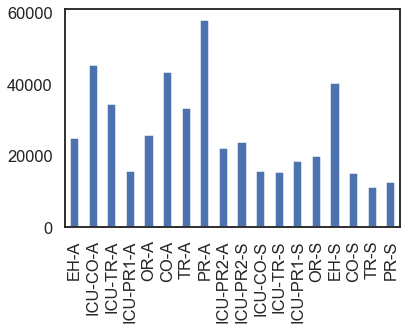

In [47]:
a.plot.bar(x=None, y=None)

In [48]:
tax2_norm=tax2/tax2.sum()*100

In [49]:
tax2_norm

,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S
taxon,,,,,,,,,,,,,,,,,,
Acidobacteria,0.000000,0.000000,0.000000,0.780750,0.000000,0.000000,0.000000,0.000000,5.235555,0.553864,0.470200,0.971192,0.059434,0.533184,0.000000,0.197941,1.301048,1.087906
Actinobacteria,12.832646,22.421525,12.353061,40.387815,31.180610,5.013425,15.644789,5.146805,17.515146,22.750719,25.594103,30.651618,9.963259,27.664652,20.186165,5.159673,3.406216,19.447312
Armatimonadetes,0.000000,0.000000,0.000000,0.044797,0.000000,0.000000,0.000000,0.000000,0.000000,0.016912,0.069895,0.000000,0.010806,0.000000,0.000000,0.000000,0.171666,0.000000
Bacteria_unclassified,8.315134,0.002209,14.193249,1.983873,12.783425,1.249884,0.000000,0.005181,9.101185,4.050397,3.666285,5.604042,2.452993,18.651297,11.534238,21.760359,25.045175,3.438418
Bacteroidetes,0.008089,0.000000,2.339419,3.743760,2.146208,0.002315,2.424897,4.407599,0.000000,5.136986,5.000635,3.340114,0.945537,3.894785,0.139748,4.255740,3.044814,2.318749
Chlamydiae,0.000000,0.000000,0.000000,0.038398,1.876466,0.000000,0.000000,0.000000,0.000000,0.207171,0.235100,0.269047,0.135077,0.868329,0.000000,0.145157,1.743766,0.000000
Chloroflexi,0.000000,0.000000,0.000000,0.185588,0.015637,0.000000,0.000000,0.000000,0.000000,0.329782,0.127081,0.275609,0.032418,0.015234,0.000000,0.000000,0.000000,0.825856
Cyanobacteria,5.662056,0.000000,0.005805,0.723154,0.383112,0.004629,0.000000,0.000000,0.000000,1.462878,1.073834,1.161494,0.216123,0.523028,5.362847,1.583531,0.009035,1.929643
Deinococcus-Thermus,0.000000,0.000000,0.000000,0.230385,0.000000,0.000000,0.000000,0.000000,0.000000,0.575004,0.603635,1.351795,0.027015,0.350378,0.309443,0.778570,0.018070,1.707298


In [50]:
tax2.index

Index(['Acidobacteria', 'Actinobacteria', 'Armatimonadetes',
       'Bacteria_unclassified', 'Bacteroidetes', 'Chlamydiae', 'Chloroflexi',
       'Cyanobacteria', 'Deinococcus-Thermus', 'Dependentiae', 'Elusimicrobia',
       'FBP', 'Firmicutes', 'Gemmatimonadetes', 'Nitrospirae',
       'Patescibacteria', 'Planctomycetes', 'Proteobacteria', 'Spirochaetes',
       'Tenericutes', 'Verrucomicrobia', 'BRC1', 'Entotheonellaeota',
       'Epsilonbacteraeota', 'Fibrobacteres', 'Fusobacteria',
       'Hydrogenedentes'],
      dtype='object', name='taxon')

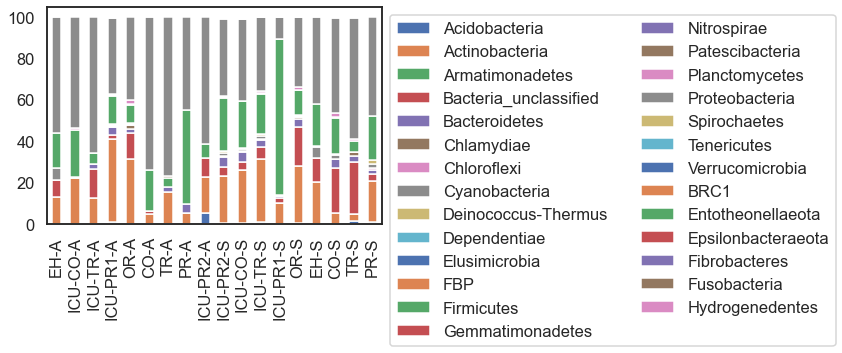

In [51]:
tax2_norm.T.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1),ncol=2)

En base a este diagrama de barras voy a ordenar por los 12 primeros filos mayoritarios de la muestra OR_S 

In [52]:
tax2_norm_orden = tax2_norm.sort_values(by=['OR-S'],ascending=False)

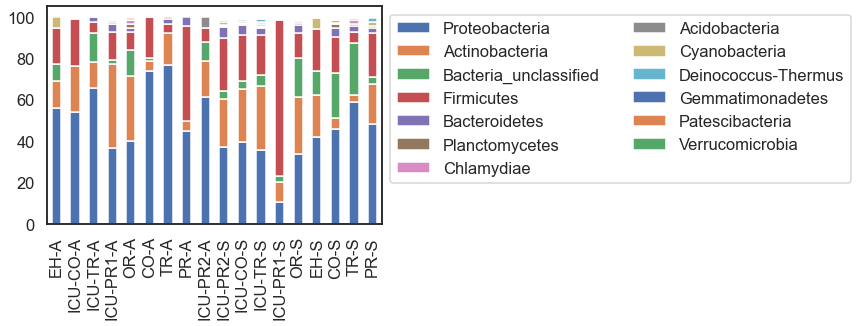

In [53]:
tax2_norm_orden[0:13].T.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1),ncol=2)

# <span style='color:blue'> PCA 
Vamos a analizar la distribución espacial de las muestras, vamos a intentar ver si las muestras se agrupan de alguna manera, para ello vamos a elegir el nivel de género el taxlevel 6

In [54]:
#from sklearn.decomposition import PCA

pca = PCA()

In [55]:
tax6= df[df.taxlevel==6]
del tax6['taxlevel']
del tax6['total']
del tax6['dominio']
del tax6['phylo']
del tax6['clase']
del tax6['orden']
del tax6['familia']
del tax6['genero']
tax6=tax6.set_index('taxon')
tax6=tax6.fillna(0)
tax6

,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S
taxon,,,,,,,,,,,,,,,,,,
Acidobacteria_unclassified,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Acidipila,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bryocella,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Granulicella,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
Acidobacteriaceae_(Subgroup_1),0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xanthomonadaceae_uncultured,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
Leptospira,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
Mollicutes_RF39_ge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:

projected = pca.fit_transform(tax6)

### Genero un archivo excel tax6 para poder consultar y incluso será util más adelante

In [57]:
with pd.ExcelWriter('tax6.xlsx', engine = 'openpyxl') as writer:
    tax6.to_excel(writer, sheet_name='tax6')

In [58]:
tax6.head()

,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S
taxon,,,,,,,,,,,,,,,,,,
Acidobacteria_unclassified,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Acidipila,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bryocella,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Granulicella,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
Acidobacteriaceae_(Subgroup_1),0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0


In [59]:
tax6.shape

(674, 18)

In [60]:
projected.shape

(674, 18)

In [61]:
projected

array([[-169.05636188,   35.12302405,  -23.63243938, ...,    0.75224997,
           0.31336332,   -2.110973  ],
       [-168.63148053,   34.68346622,  -22.88884632, ...,   -1.27368608,
          -0.29775275,   -4.09948455],
       [-169.51332696,   35.61326035,  -24.48408705, ...,    2.06649727,
           0.31706702,   -2.0408931 ],
       ...,
       [-169.36731598,   35.41734172,  -23.82057298, ...,    3.81147292,
           0.4472032 ,   -1.23315806],
       [-169.55718178,   35.63746301,  -24.40888176, ...,    3.39451821,
           0.73775491,   -0.56933993],
       [-169.4491595 ,   35.51190341,  -24.26797784, ...,    3.48987479,
           1.53189175,    1.7959702 ]])

In [62]:
pca.explained_variance_ratio_

array([4.41916008e-01, 1.95697618e-01, 1.12560767e-01, 7.19870343e-02,
       6.22648967e-02, 3.71560892e-02, 2.31559660e-02, 1.86665995e-02,
       1.11464678e-02, 8.84157300e-03, 6.99248530e-03, 2.72284932e-03,
       2.27784995e-03, 1.64379274e-03, 1.33613588e-03, 9.83898638e-04,
       3.66619042e-04, 2.83349350e-04])

<BarContainer object of 18 artists>

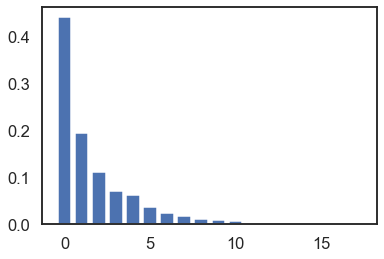

In [63]:
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)

In [64]:
pca.explained_variance_ratio_[:3].sum()

0.7501743933342473

In [65]:
np.log1p(0)

0.0

In [66]:
from sklearn.preprocessing import FunctionTransformer

normalized = FunctionTransformer(np.log1p).fit_transform(tax6)
projected = pca.fit_transform(normalized)

In [67]:
normalized.describe()

,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S
count,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
mean,0.305348,0.364467,0.351666,1.328098,0.704926,0.298093,0.215230,0.308463,0.229635,1.597743,1.443842,1.462005,0.760622,0.861136,0.376485,0.637455,0.381219,0.528326
std,1.268544,1.460993,1.391045,1.604152,1.730318,1.331433,1.113079,1.361154,1.136150,1.721394,1.577496,1.628236,1.331374,1.642998,1.456335,1.498285,1.231858,1.452136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,1.098612,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,2.197225,0.000000,0.000000,0.000000,0.000000,0.000000,2.708050,2.397895,2.564949,1.098612,0.693147,0.000000,0.000000,0.000000,0.000000
max,8.913147,8.524367,8.541105,6.929517,8.092851,8.755265,9.438591,9.780698,8.365905,8.149024,7.447168,7.008505,9.273878,8.209036,8.917445,8.255569,7.940228,7.434848


<BarContainer object of 18 artists>

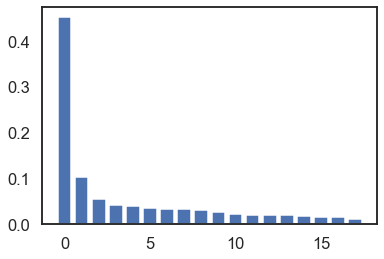

In [68]:
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)

In [69]:
pca.explained_variance_ratio_[:3].sum()

0.6122728457649456

In [70]:
df.set_index('taxon').phylo

taxon
Root                                      NaN
Bacteria                                  NaN
Acidobacteria                   Acidobacteria
Acidobacteria_unclassified      Acidobacteria
Acidobacteria_unclassified      Acidobacteria
                                   ...       
Mollicutes_RF39_ge                Tenericutes
Opitutales                    Verrucomicrobia
Puniceicoccaceae              Verrucomicrobia
Puniceicoccaceae_ge           Verrucomicrobia
ADurb.Bin063-1                Verrucomicrobia
Name: phylo, Length: 1215, dtype: object

In [71]:
first_four = pd.DataFrame(data =projected[:, :4], index=tax6.index, columns = ['PC%d' % n for n in range(1, 5) ])
first_four

,PC1,PC2,PC3,PC4
taxon,,,,
Acidobacteria_unclassified,-1.975848,-0.138391,-0.683586,-0.329064
Acidipila,-1.856063,-0.283758,-0.915086,-0.423949
Bryocella,-2.915325,0.787787,-0.125014,-0.064089
Granulicella,-1.851827,0.121514,0.243263,0.471065
Acidobacteriaceae_(Subgroup_1),-2.139423,0.337023,-0.138789,-0.413517
...,...,...,...,...
Xanthomonadaceae_uncultured,-1.861760,-0.077061,0.166855,-0.245863
Leptospira,-2.041071,0.436900,1.045328,0.659274
Mollicutes_RF39_ge,-2.773337,0.590895,0.141356,0.006295


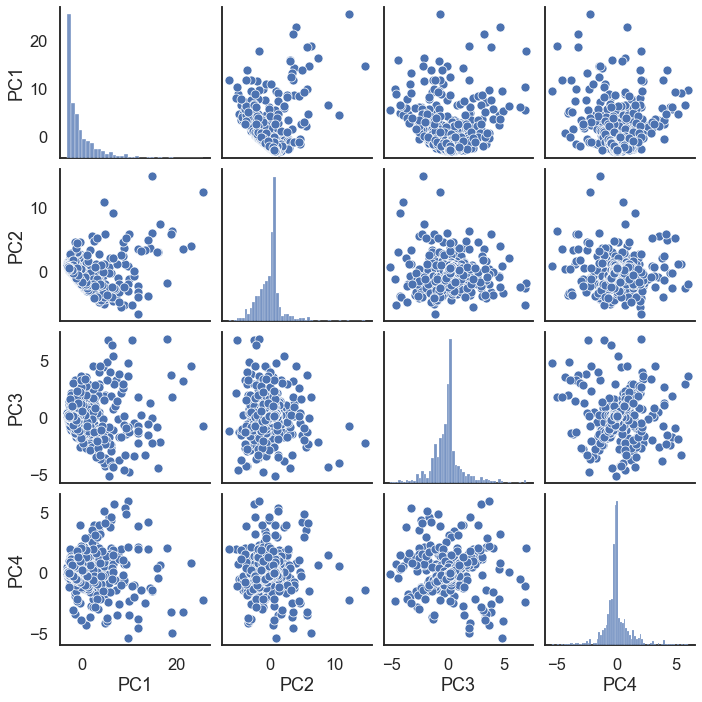

In [72]:
sns.pairplot(first_four, kind='scatter')

In [73]:
import matplotlib.pyplot as plt

In [74]:
first_four['phylo'] =  df[df.taxlevel == 6].set_index('taxon').phylo #recupero la columna phylo desde el df no el tax6
first_four

,PC1,PC2,PC3,PC4,phylo
taxon,,,,,
Acidobacteria_unclassified,-1.975848,-0.138391,-0.683586,-0.329064,Acidobacteria
Acidipila,-1.856063,-0.283758,-0.915086,-0.423949,Acidobacteria
Bryocella,-2.915325,0.787787,-0.125014,-0.064089,Acidobacteria
Granulicella,-1.851827,0.121514,0.243263,0.471065,Acidobacteria
Acidobacteriaceae_(Subgroup_1),-2.139423,0.337023,-0.138789,-0.413517,Acidobacteria
...,...,...,...,...,...
Xanthomonadaceae_uncultured,-1.861760,-0.077061,0.166855,-0.245863,Proteobacteria
Leptospira,-2.041071,0.436900,1.045328,0.659274,Spirochaetes
Mollicutes_RF39_ge,-2.773337,0.590895,0.141356,0.006295,Tenericutes


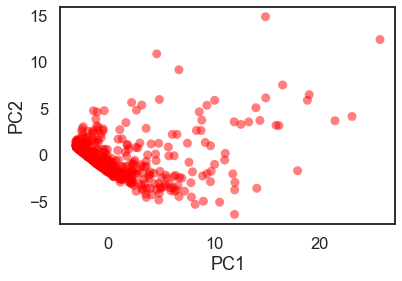

In [75]:
plt.scatter(projected[:, 0], projected[:, 1],
            c='red', edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow_r', 10))
plt.xlabel('PC1')
plt.ylabel('PC2');

Ploteo el PCA PC1 y PC2 en los ejes del biplot y pongo color en vez de a la columna taxon  de tax6 que coincide con la de géneros, recupero la columna de phylo y la uso para pintar los filos, no espero grandes resultados informativos

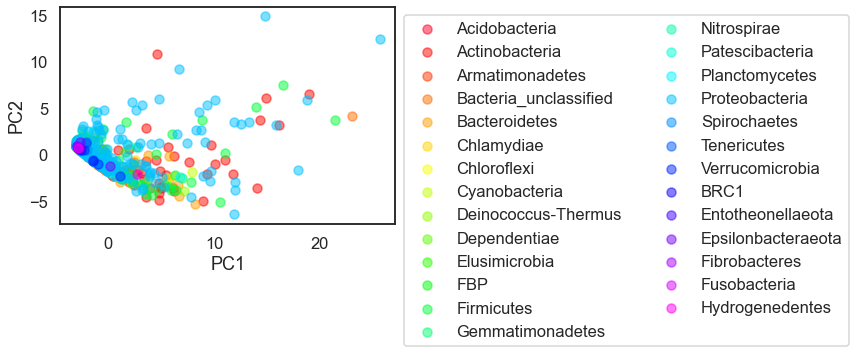

In [76]:
cm = plt.get_cmap('gist_rainbow')
num_colors = len(first_four.phylo.unique())
fig, ax =plt.subplots()
ax.set_prop_cycle('color', [cm(1.*i/num_colors) for i in range(num_colors)])
for phylo in first_four.phylo.unique():
    ix=np.where(first_four.phylo==phylo)
    ax.scatter(first_four.PC1.values[ix],first_four.PC2.values[ix],label=phylo,alpha=0.5)
 
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1,1), ncol=2)
plt.show()

En vista de esta gráfica que no podemos decir gran cosa, vamos a estudiar los loadings de las componenetes y ver como afectan a las muestras,
e intentar que con las variables categóricas que tenemos en metadatos, si encontramos alguna explicación

In [77]:
pca.components_

array([[ 0.18603305,  0.19639245,  0.21990182,  0.28324276,  0.30863751,
         0.12819985,  0.1335514 ,  0.13970731,  0.14590491,  0.32688735,
         0.30799253,  0.31312701,  0.2559669 ,  0.29954732,  0.20337275,
         0.23201189,  0.16247215,  0.22650756],
       [ 0.24526894,  0.37258616,  0.32027871, -0.25786693,  0.14332379,
         0.29706948,  0.1618421 ,  0.31446341,  0.29449068, -0.34638267,
        -0.24849197, -0.2740508 , -0.10166996, -0.10173367,  0.14298724,
        -0.08070144,  0.08272829,  0.00551586],
       [-0.13365282, -0.02255517,  0.00920916, -0.41160006, -0.30209914,
        -0.14083926, -0.07539098, -0.12973546,  0.03192247, -0.13404033,
         0.01005246, -0.08301719,  0.2003867 ,  0.30486347,  0.450572  ,
         0.47508785,  0.24665507, -0.17284806],
       [-0.23198726, -0.26539323,  0.01361928, -0.1600604 ,  0.38506959,
         0.08161251, -0.10416485,  0.34860294, -0.10933396, -0.07607398,
        -0.11718005, -0.04557928, -0.09889238,  0.319

In [78]:
PC_names = [f'PC{n+1}' for n in range(len(pca.components_))]

In [79]:
#Componentes=pd.DataFrame(
#    data    = pca.components_,
#    columns = tax6.columns,
#    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10', 'PC11', 'PC12','PC13', 'PC14', 'PC15','PC16', 'PC17','PC18']
#)

In [80]:
Componentes=pd.DataFrame(
    data    = pca.components_,
    columns = tax6.columns,
    index   = PC_names
)

In [81]:
#fig = sns.pairplot(Componentes, kind='scatter')

#fig.savefig("componentes.png")
#sns.plt.show()

In [82]:
first_4 = Componentes[0:4]
first_4

,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S
PC1,0.186033,0.196392,0.219902,0.283243,0.308638,0.128200,0.133551,0.139707,0.145905,0.326887,0.307993,0.313127,0.255967,0.299547,0.203373,0.232012,0.162472,0.226508
PC2,0.245269,0.372586,0.320279,-0.257867,0.143324,0.297069,0.161842,0.314463,0.294491,-0.346383,-0.248492,-0.274051,-0.101670,-0.101734,0.142987,-0.080701,0.082728,0.005516
PC3,-0.133653,-0.022555,0.009209,-0.411600,-0.302099,-0.140839,-0.075391,-0.129735,0.031922,-0.134040,0.010052,-0.083017,0.200387,0.304863,0.450572,0.475088,0.246655,-0.172848
PC4,-0.231987,-0.265393,0.013619,-0.160060,0.385070,0.081613,-0.104165,0.348603,-0.109334,-0.076074,-0.117180,-0.045579,-0.098892,0.319690,-0.515305,0.285510,0.261220,-0.042520


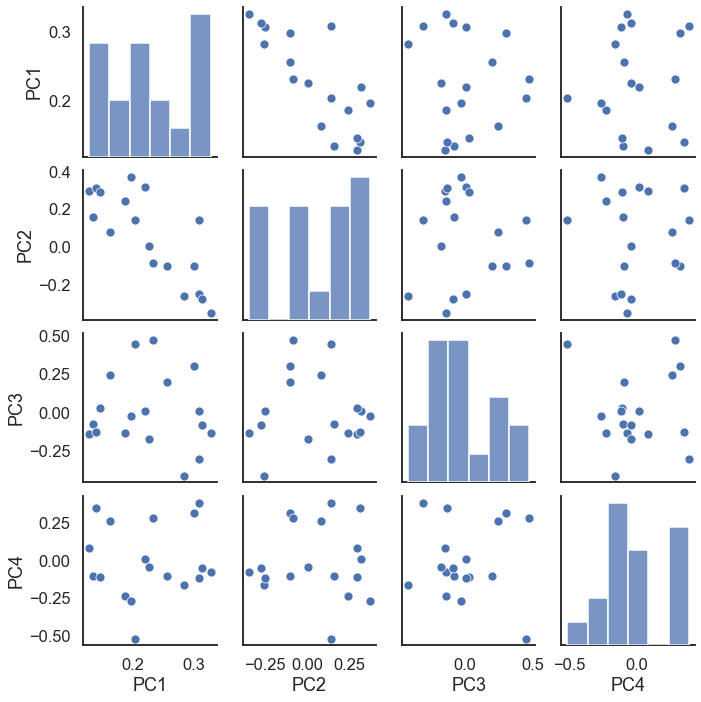

In [83]:
 sns.pairplot(first_4.T, kind='scatter')

In [84]:
metadatos

,Muestra tipo,SUM Python merge,Ventilación,Tipo zona,Zona,Tª,H. relativa,"Particulas 0,3 m",Initial number of sequences,% of removed chimera,Secuencias antes de restar negativos,Sequences final number,Number of OTUs,Chao-1,Shannon H Index,Simpson Index
Name,,,,,,,,,,,,,,,,
CO-A,Aire,43204.0,Cerrada,HOSPITALARIA,Sala espera interior y pasillo,23.6,51.4,49555,127978,0.9,63073,43204,45,59.00,2.731,0.9140
CO-S,Superfie,15156.0,Cerrada,HOSPITALARIA,Sala espera interior y pasillo,23.6,51.4,49555,114536,2.1,53946,15156,119,126.00,3.185,0.8803
EH-A,Aire,24726.0,Cerrada,EXTERNA,Sala espera fuera de la unidad,23.6,48.1,51952,121854,0.8,51395,24726,52,71.50,2.662,0.8765
EH-S,Superfie,40072.0,Cerrada,EXTERNA,Sala espera fuera de la unidad,23.6,48.1,51952,145497,0.9,68237,40072,54,57.75,2.924,0.9159
ICU-CO-A,Aire,45269.0,Abierta,UVI,Pasillos,24.9,50.1,134665,128997,3.4,62697,45269,51,51.17,3.014,0.9364
ICU-CO-S,Superfie,15738.0,Abierta,UVI,Pasillos,24.9,50.1,134665,102384,4.5,26178,15738,398,422.80,4.415,0.9668
ICU-PR1-A,Aire,15626.0,Cerrada,UVI,Hab 408? Con paciente de 4 días,25.8,49.5,35430,131555,5.8,19876,15626,374,398.00,2.608,0.9785
ICU-PR1-S,Superfie,18508.0,Abierta,UVI,Hab 408? Con paciente de 4 días,25.8,49.5,35430,93628,8.3,43931,18508,235,254.00,2.254,0.6584
ICU-PR2-A,Aire,22118.0,Abierta,UVI,Hab 405 Vacía,24.8,45.9,25311,141284,3.9,67436,22118,37,39.50,4.483,0.9070


In [85]:
metadatos.select_dtypes(object).columns

Index(['Muestra tipo', 'Ventilación', 'Tipo zona', 'Zona'], dtype='object')

In [86]:
first_4_meta = first_4.T.join(metadatos).reset_index()

In [87]:
import altair as alt

scatter = alt.Chart(first_4_meta).mark_point().encode(
    x='PC1',
    y='PC2',
    color='Muestra tipo',
    shape='Tipo zona'
)

text = scatter.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text='index'
)

scatter + text

alt.LayerChart(...)

Text(0.5, 0, 'PC1')

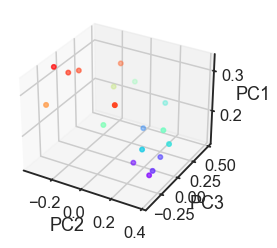

In [88]:
ax = plt.axes(projection='3d')


# Data for three-dimensional scattered points
zdata = first_4.T['PC1']
xdata = first_4.T['PC2']
ydata = first_4.T['PC3']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='rainbow');
ax.set_xlabel('PC2')
ax.set_ylabel('PC3')
ax.set_zlabel('PC1')


In [89]:
first_4.iloc[1]

EH-A         0.245269
ICU-CO-A     0.372586
ICU-TR-A     0.320279
ICU-PR1-A   -0.257867
OR-A         0.143324
CO-A         0.297069
TR-A         0.161842
PR-A         0.314463
ICU-PR2-A    0.294491
ICU-PR2-S   -0.346383
ICU-CO-S    -0.248492
ICU-TR-S    -0.274051
ICU-PR1-S   -0.101670
OR-S        -0.101734
EH-S         0.142987
CO-S        -0.080701
TR-S         0.082728
PR-S         0.005516
Name: PC2, dtype: float64

### Ahora intentaría hacer un RDA , un análisis de redundancia, para encontrar algun refuerzo de las variables númericas del dataframe de Metadotos, el paquete que encontré en python no me convencía y lo he hecho en R 

# <span style='color:Red'> Network  </span> 

Una de las características importantes del método Bray-Curtis es que varía entre 0 y 1, dos comunidades que no comparten ninguna especie tendrían 1 como resultado.

In [90]:
from scipy.spatial import distance

In [91]:
BC=pd.DataFrame([[distance.braycurtis(tax6[i], tax6[j]) for i in tax6 ] for j in tax6], 
               columns=tax6.columns,index=tax6.columns)
BC

,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S
EH-A,0.000000,0.672005,0.661434,0.774732,0.685326,0.702841,0.669708,0.727689,0.593288,0.806813,0.819988,0.805029,0.906648,0.807200,0.621346,0.820621,0.802201,0.794475
ICU-CO-A,0.672005,0.000000,0.676375,0.859791,0.732643,0.716863,0.731536,0.771792,0.712645,0.783636,0.816513,0.858035,0.782806,0.900219,0.642915,0.931585,0.936170,0.851716
ICU-TR-A,0.661434,0.676375,0.000000,0.829789,0.622474,0.754974,0.777847,0.825127,0.653391,0.765700,0.795143,0.801537,0.879081,0.698740,0.583281,0.751900,0.742273,0.787952
ICU-PR1-A,0.774732,0.859791,0.829789,0.000000,0.635441,0.892640,0.864029,0.944836,0.852798,0.482153,0.499809,0.424526,0.807523,0.730174,0.874574,0.809629,0.827152,0.665261
OR-A,0.685326,0.732643,0.622474,0.635441,0.000000,0.852291,0.855373,0.874748,0.671559,0.635562,0.658551,0.631152,0.879242,0.609524,0.687504,0.672869,0.672997,0.734524
CO-A,0.702841,0.716863,0.754974,0.892640,0.852291,0.000000,0.746707,0.771641,0.709439,0.921563,0.923111,0.921120,0.964415,0.948169,0.794322,0.938074,0.937205,0.904153
TR-A,0.669708,0.731536,0.777847,0.864029,0.855373,0.746707,0.000000,0.658573,0.699923,0.842193,0.834537,0.883913,0.912644,0.882292,0.697087,0.955708,0.926307,0.840092
PR-A,0.727689,0.771792,0.825127,0.944836,0.874748,0.771641,0.658573,0.000000,0.769827,0.898543,0.906869,0.943177,0.936603,0.936334,0.776630,0.967231,0.960590,0.876498
ICU-PR2-A,0.593288,0.712645,0.653391,0.852798,0.671559,0.709439,0.699923,0.769827,0.000000,0.840944,0.859045,0.853843,0.932162,0.753127,0.676122,0.818211,0.766649,0.858431
ICU-PR2-S,0.806813,0.783636,0.765700,0.482153,0.635562,0.921563,0.842193,0.898543,0.840944,0.000000,0.399391,0.424340,0.648197,0.638344,0.713640,0.715626,0.736636,0.583832


In [92]:
import networkx as nx
#nx.test()

In [93]:
G = nx.from_pandas_adjacency(BC)
G.name = "Graph from pandas adjacency matrix"
print(nx.info(G))

Name: Graph from pandas adjacency matrix
Type: Graph
Number of nodes: 18
Number of edges: 153
Average degree:  17.0000


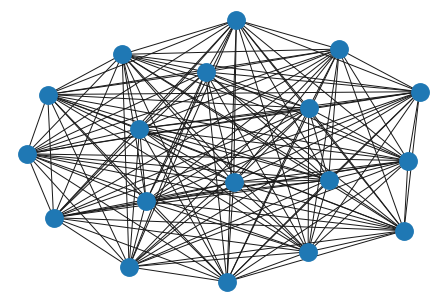

In [94]:
nx.draw(G) # esto es la matriz con todas las posibles interaacciones como si todo fuera 1 o TRUE

In [95]:
BC<0.55

,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S
EH-A,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
ICU-CO-A,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
ICU-TR-A,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
ICU-PR1-A,False,False,False,True,False,False,False,False,False,True,True,True,False,False,False,False,False,False
OR-A,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
CO-A,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
TR-A,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
PR-A,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
ICU-PR2-A,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
ICU-PR2-S,False,False,False,True,False,False,False,False,False,True,True,True,False,False,False,False,False,False


Con esta parte del código selecciono que nivel de relación queiro entre las muestras lo voy a dejar en 0,55 por ejemplo que me selecciona muchas muestras libres y dos nodos independientes de muestras relacionadas entres si.

Name: Graph from pandas adjacency matrix
Type: Graph
Number of nodes: 18
Number of edges: 28
Average degree:   3.1111


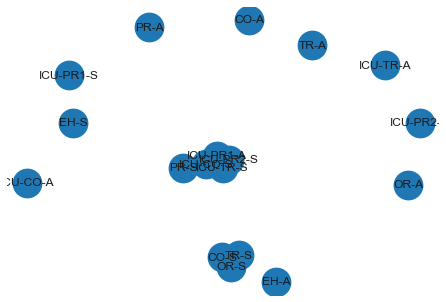

In [96]:
G = nx.from_pandas_adjacency(BC<0.55)
#G.add_node('AAAA')
#G.add_edge('PR-S', 'AAAA')
G.name = "Graph from pandas adjacency matrix"
print(nx.info(G))
nx.draw_spring(G,with_labels =True,node_size=800, width=2)


Una vez creada la matriz con los distintos puntos de muestreo, se procedede a introducir los microorganismos de las muestras:

Se necesita crear una nueva matriz de adyacencia con los datos anteriores y con los de los microorganismos normalizados, y tiene que ser cuadrada para que funcione.

Se va hacer con el nivel taxlevel 6 (géneros).

Primero se normaliza.

Se concatena con la matriz de Bray-curtis anterior.

Para que sea cuadrada se ponen columnas con los nombres de microorganismos y se rellena con NaN que se traducirán como False.

Como visualizar todos los microorganismos es complicado se seleciona en función del porcentaje respecto del total de cada muestra, es decir solo saldrá un género si el número supera el umbral del 0,03 o 0,02 por ejemplo, la idea es que se piueda cambiar.
Eso implica que la tabla es dinámica, ya que se eliminan las filas que no contienen información .

In [97]:
tax6norm = tax6 / tax6.sum()

In [98]:
tax6b = tax6norm > 0.03  # Seleccionar los que superan un umbral
tax6b = tax6b[tax6b.T.any()]  # Eliminar las filas vacías

tax6b[tax6b.index] = False  # Añadir columnas con los nombres de los microorganismos
adj = pd.concat([tax6b,BC<0.55]).fillna(False) # Añadir filas con la adyacencia de Bray-Curtis
#adj.head(50)

Name: Hospitales
Type: Graph
Number of nodes: 83
Number of edges: 169
Average degree:   4.0723


{'Solibacteraceae_(Subgroup_3)': Text(-0.22616910475818958, -0.8604701244011939, 'Solibacteraceae_(Subgroup_3)'),
 'Actinobacteria_unclassified': Text(-0.5666112888613879, -0.796184411009663, 'Actinobacteria_unclassified'),
 'Bifidobacterium': Text(-0.10191815972166307, 0.7661186509425778, 'Bifidobacterium'),
 'Corynebacterium_1': Text(-0.16836391488672406, 0.4751467374870136, 'Corynebacterium_1'),
 'Corynebacteriaceae': Text(0.2992465490780168, 0.38997860603594664, 'Corynebacteriaceae'),
 'Rhodococcus': Text(-0.3151943171663497, -0.12462530887738427, 'Rhodococcus'),
 'Blastococcus': Text(0.07326390757132789, 0.9525504925667897, 'Blastococcus'),
 'Modestobacter': Text(-0.061128310677886766, 0.9445859675409762, 'Modestobacter'),
 'Kocuria': Text(-0.1468519679904532, 0.3775990359149745, 'Kocuria'),
 'Pseudoglutamicibacter': Text(-0.3037706950145971, -0.35765310652729526, 'Pseudoglutamicibacter'),
 'Rothia': Text(-0.8067613852301222, 0.39170010368431235, 'Rothia'),
 'Micrococcaceae': Text

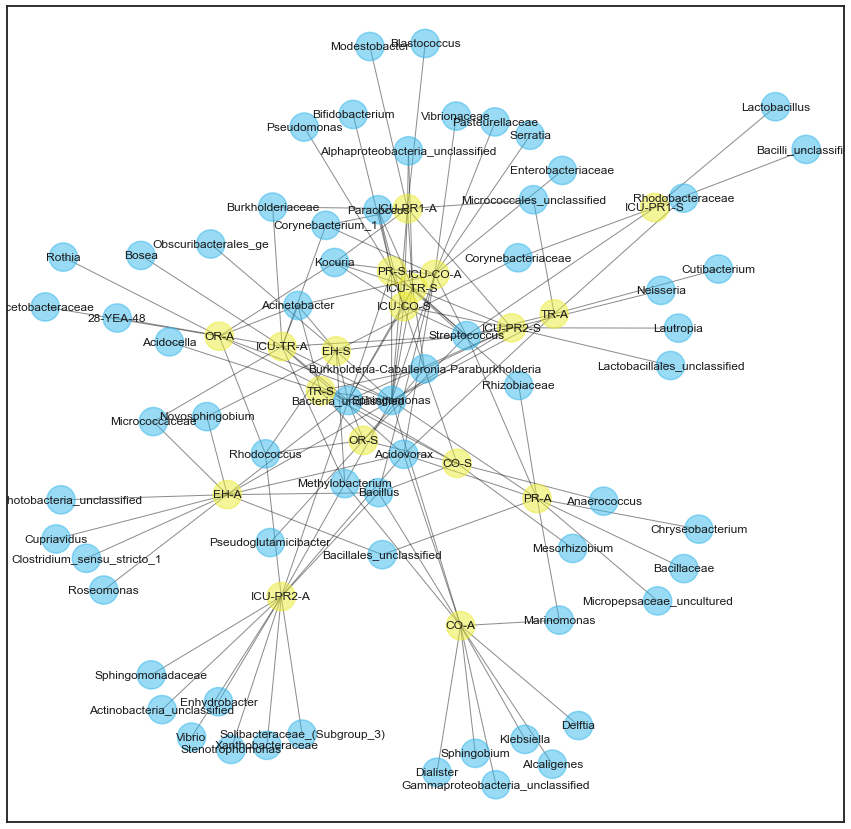

In [99]:
def colorize(node):
    if node in tax6.columns:
        return '#ebeb34'
    return '#34b7eb'

G = nx.from_pandas_adjacency(adj)
G.name = "Hospitales"
print(nx.info(G))

plt.figure(figsize=(15, 15))
pos=nx.spring_layout(G)
node_color = [colorize(x) for x in G.nodes()]

nx.draw_networkx_nodes(G, pos=pos, node_size=800,node_color=node_color, alpha=0.5)
nx.draw_networkx_edges(G, pos=pos, width=1, alpha=0.5)
nx.draw_networkx_labels(G, pos=pos)

In [100]:
tax6norm.where(tax6norm > 0.03, 0)

,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S
taxon,,,,,,,,,,,,,,,,,,
Acidobacteria_unclassified,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Acidipila,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bryocella,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Granulicella,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Acidobacteriaceae_(Subgroup_1),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xanthomonadaceae_uncultured,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Leptospira,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mollicutes_RF39_ge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
tax6b = tax6norm.where(tax6norm > 0.03, 0)  # Seleccionar los que superan un umbral
tax6b = tax6b[tax6b.T.any()]  # Eliminar las filas vacías
tax6b = tax6b * 4 # Incrementar valores absolutos para que sean comparables con los de los lugares de muestreo

tax6b[tax6b.index] = 0  # Añadir columnas con los nombres de los microorganismos
adj = pd.concat([tax6b,BC<0.55]).fillna(0) # Añadir filas con la adyacencia de Bray-Curtis
adj.head(50)

,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A,ICU-PR2-S,...,Enterobacteriaceae,Gammaproteobacteria_unclassified,Marinomonas,Pasteurellaceae,Acinetobacter,Enhydrobacter,Pseudomonas,Vibrio,Vibrionaceae,Stenotrophomonas
Solibacteraceae_(Subgroup_3),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.209422,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Actinobacteria_unclassified,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.168731,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bifidobacterium,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Corynebacterium_1,0.000000,0.444896,0.179839,0.121848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Corynebacteriaceae,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rhodococcus,0.000000,0.000000,0.000000,0.000000,0.185614,0.000000,0.000000,0.000000,0.437110,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Blastococcus,0.000000,0.000000,0.000000,0.154870,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Modestobacter,0.000000,0.000000,0.000000,0.172021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kocuria,0.000000,0.132541,0.000000,0.151030,0.172791,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pseudoglutamicibacter,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Por último introduzco los pesos que son la abundancia de las secuencias en este caso.

Name: Hospitales
Type: Graph
Number of nodes: 83
Number of edges: 169
Average degree:   4.0723


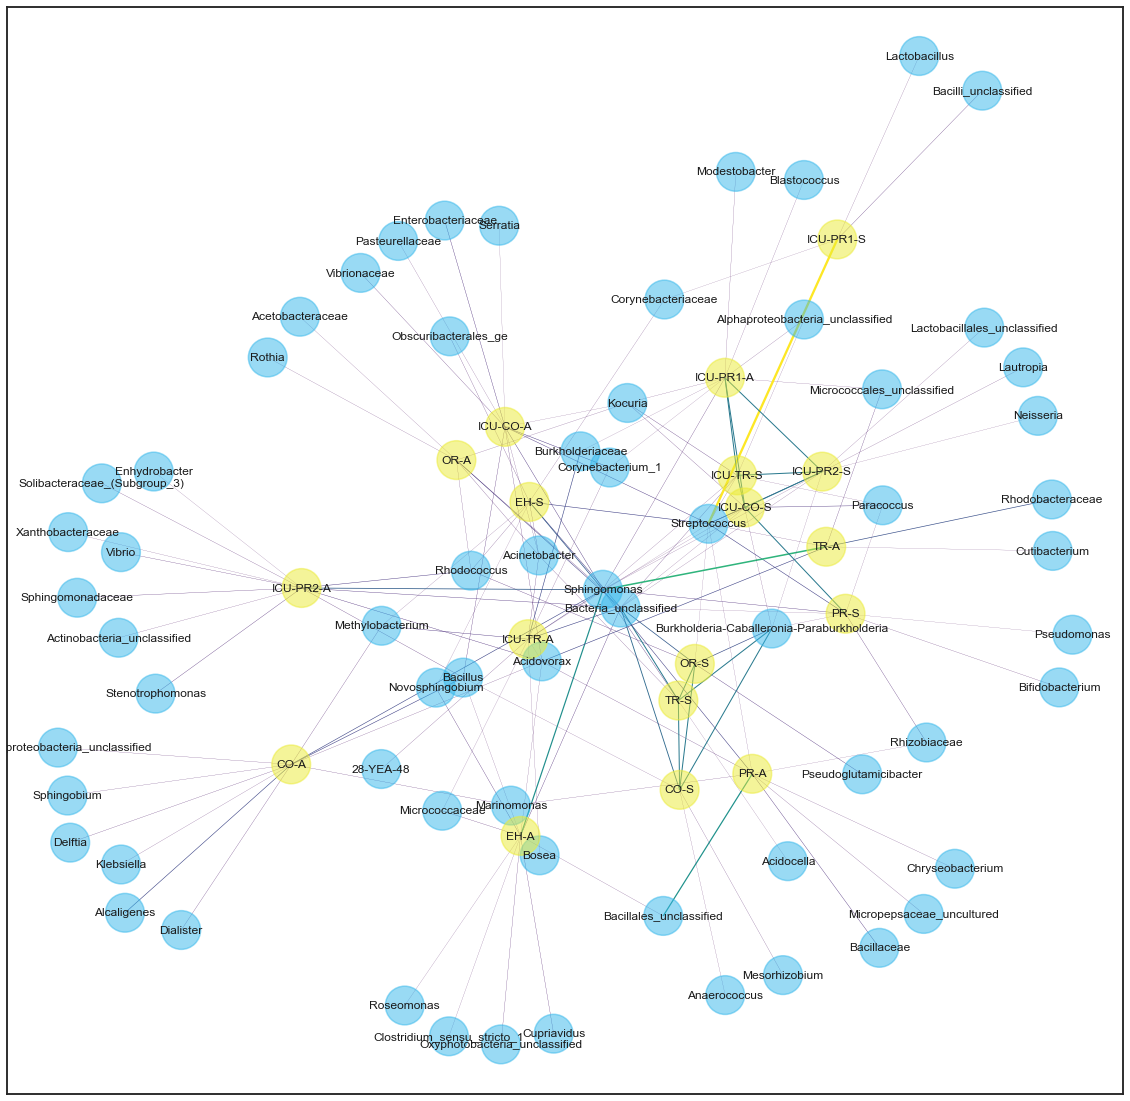

In [102]:
G = nx.from_pandas_adjacency(adj)
G.name = "Hospitales"


plt.figure(figsize=(20, 20))
pos=nx.spring_layout(G, weight=None)
node_color = [colorize(x) for x in G.nodes()]


weights = np.array(list(nx.get_edge_attributes(G, 'weight').values()))

nx.draw_networkx_nodes(G, pos=pos, node_size=1500,node_color=node_color, alpha=0.5)
nx.draw_networkx_edges(G, pos=pos, width=weights, edge_color=weights, edge_cmap=plt.get_cmap('viridis'))
nx.draw_networkx_labels(G, pos=pos)

print(nx.info(G))

In [103]:
nx.is_weighted(G)

True

In [104]:
#list(nx.get_edge_attributes(G, 'weight').values())

### CLUSTERMAP
No me da mucha información.Al final es casi mejor el barplot de barras apiladas.

In [105]:
tax6

,EH-A,ICU-CO-A,ICU-TR-A,ICU-PR1-A,OR-A,CO-A,TR-A,PR-A,ICU-PR2-A,ICU-PR2-S,ICU-CO-S,ICU-TR-S,ICU-PR1-S,OR-S,EH-S,CO-S,TR-S,PR-S
taxon,,,,,,,,,,,,,,,,,,
Acidobacteria_unclassified,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Acidipila,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bryocella,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Granulicella,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
Acidobacteriaceae_(Subgroup_1),0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xanthomonadaceae_uncultured,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
Leptospira,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
Mollicutes_RF39_ge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
tax2=tax2.fillna(0)

In [107]:
sns.set_theme(color_codes=True)

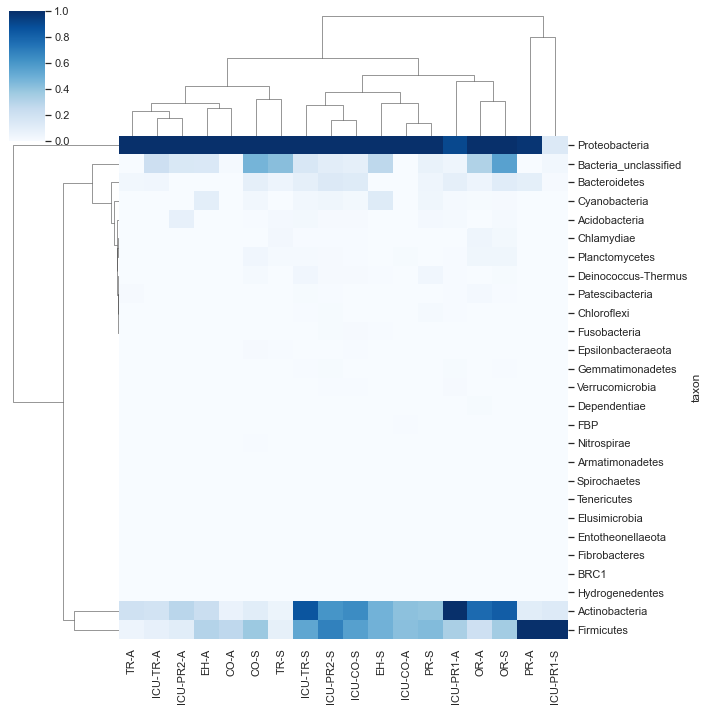

In [108]:
g = sns.clustermap(tax2, cmap="Blues", standard_scale=1)